In [4]:
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn
from pandas.tools.plotting import scatter_matrix
from math import log

import jupynbimp
import merge_all_data

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


importing Jupyter notebook from merge_all_data.ipynb
importing Jupyter notebook from restaurants_data_cleaning.ipynb
importing Jupyter notebook from review_data_process.ipynb
importing Jupyter notebook from review_data_getData.ipynb
importing Jupyter notebook from topic_dictionary.ipynb
importing Jupyter notebook from review_data_classify.ipynb
importing Jupyter notebook from review_data_topics_extractor.ipynb
importing Jupyter notebook from census2010_data_cleaning.ipynb
importing Jupyter notebook from acs2013_data_cleaning.ipynb


In [7]:
MIN_REVIEW_COUNT = 10

In [8]:
restaurants = merge_all_data.getData(fromCache=False)

In [9]:
restaurants.columns

Index(['business_id', 'Unnamed: 0', 'median_age', 'average_household_size',
       'population_density', 'home_mortgage_density', 'home_owner_density',
       'renter_density', 'household_density', 'family_household_density',
       'single_household_density', 'hispanic_latino_population_density',
       'white_population_density', 'black_population_density',
       'native_american_population_density', 'asian_population_density',
       'median_home_value', 'median_household_income',
       'density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate', 'full_address', 'name', 'beer_wine',
       'full_bar', 'price_range', 'attire', 'takeout', 'waiter_service',
       'outdoor_seating', 'uniqueness', 'review_span', 'sentiment', 'stars',
       'review_count', 'opinion', 'alcohol', 'atmosphere', 'time', 'people',
       'food', 'service', 'cost', 'location', 'rating', 'geometry', 'dist_CBD',
       'dist_scottsdale', 'dist_mwy_exit', 'competi

## Response Variables

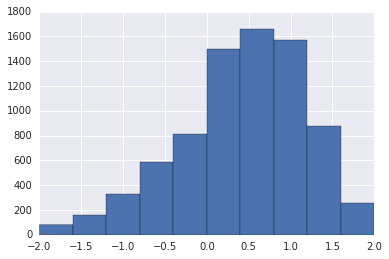

In [10]:
plot.figure()
restaurants['stars'].apply(lambda stars: stars - 3).hist()

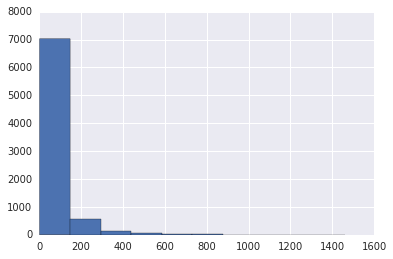

In [11]:
plot.figure()
restaurants['review_count'].hist()

In [12]:
restaurants['log_review_count'] = restaurants['review_count'].apply(lambda count: log(count))

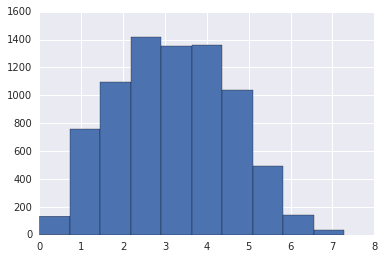

In [13]:
plot.figure()
restaurants['log_review_count'].hist()

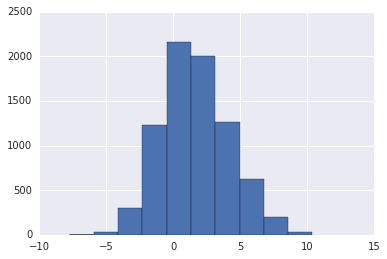

In [14]:
plot.figure()
restaurants['rating'].hist()

## Calculated Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc823eaa048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc83e5b7b70>]], dtype=object)

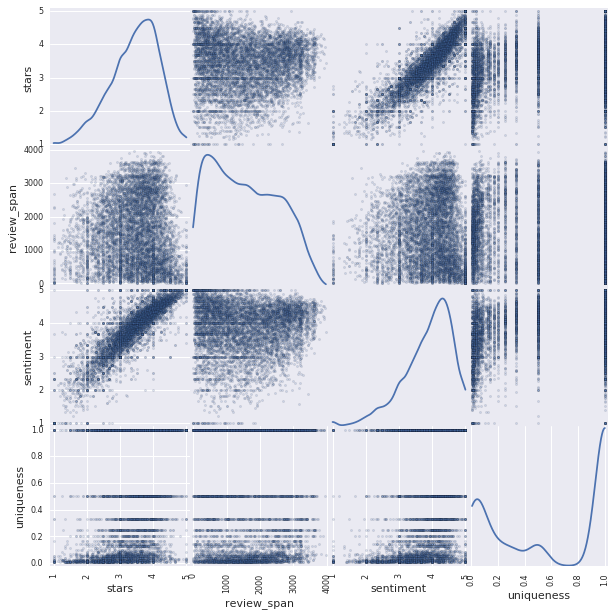

In [15]:
scatter_matrix(restaurants[['stars', 'review_span', 'sentiment', 'uniqueness']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bbafd940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc88118a518>]], dtype=object)

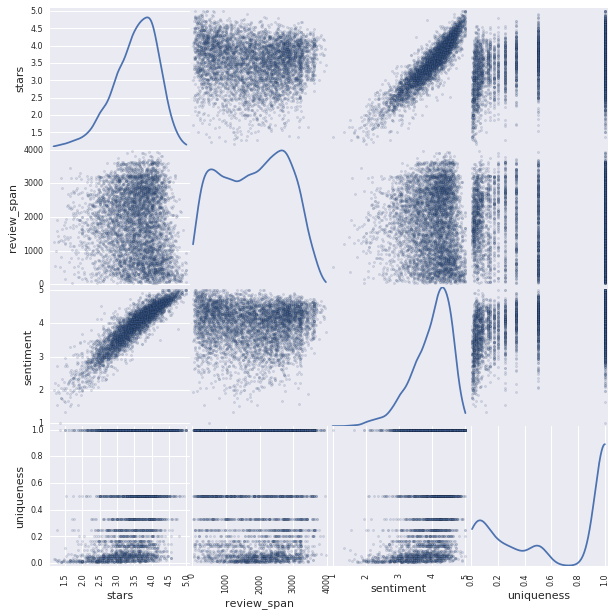

In [16]:
scatter_matrix(restaurants[restaurants['review_count']>MIN_REVIEW_COUNT][['stars', 'review_span', 'sentiment', 'uniqueness']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Review Span

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


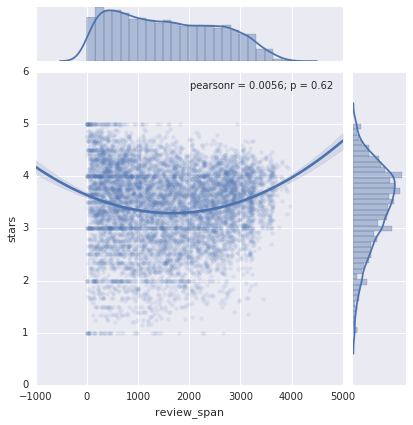

In [17]:
seaborn.jointplot(x='review_span', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [18]:
restaurants['log_review_span'] = restaurants['review_span'].apply(lambda span: log(span+1)**.01)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


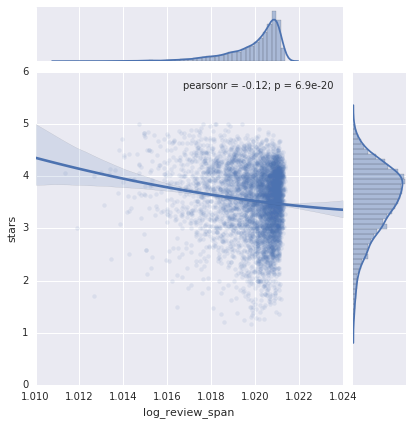

In [19]:
seaborn.jointplot(x='log_review_span', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


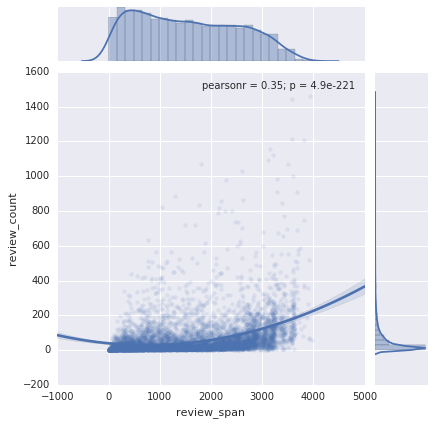

In [20]:
seaborn.jointplot(x='review_span', y='review_count',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


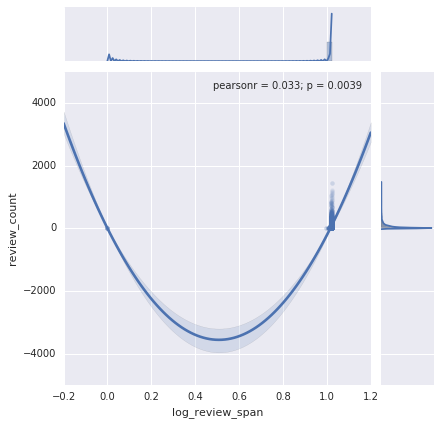

In [21]:
seaborn.jointplot(x='log_review_span', y='review_count',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Review Count

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


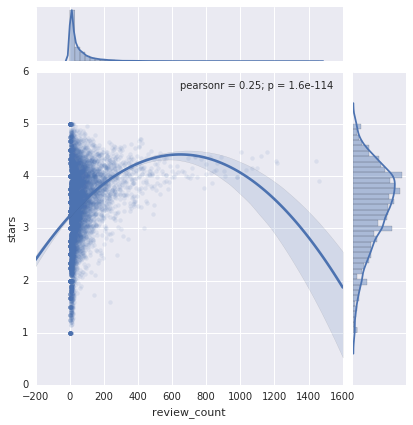

In [22]:
seaborn.jointplot(x='review_count', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [23]:
restaurants['log_curt_review_count'] = restaurants['review_count'].apply(lambda count: log(count**0.33))

In [27]:
800**0.33

9.078617017188666

In [31]:
log(9)

2.1972245773362196

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


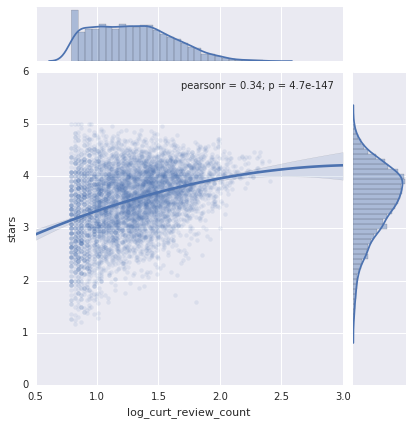

In [24]:
seaborn.jointplot(x='log_curt_review_count', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Sentiment

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


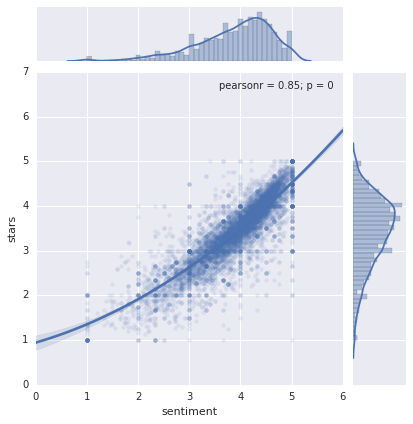

In [25]:
seaborn.jointplot(x='sentiment', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [26]:
restaurants['ex1.5_sentiment'] = restaurants['sentiment']**1.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


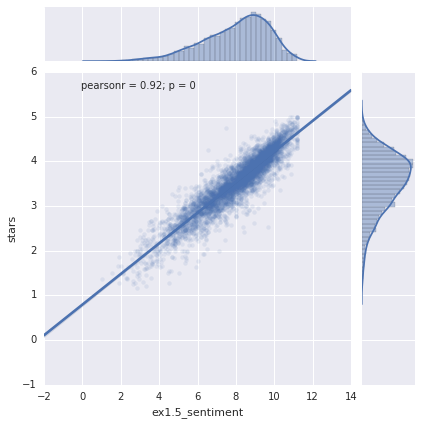

In [27]:
seaborn.jointplot(x='ex1.5_sentiment', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=1, 
                  scatter_kws={'alpha':0.1}
                 )

### Uniqueness

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


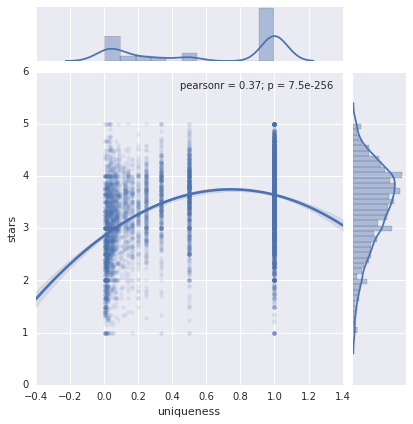

In [28]:
seaborn.jointplot(x='uniqueness', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [29]:
restaurants['log_sq_uniqueness'] = (restaurants['uniqueness'].apply(lambda score: log(score)**2))

In [24]:
log(1)

0.0

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


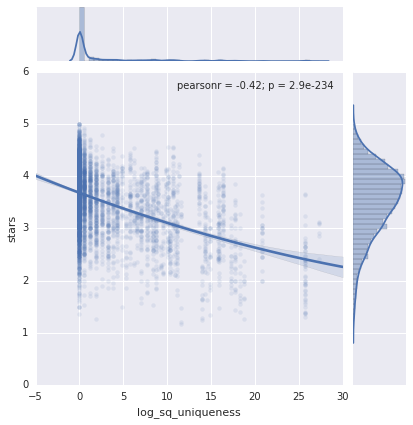

In [30]:
seaborn.jointplot(x='log_sq_uniqueness', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Spatial Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc83ff53550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bc1a8400>]], dtype=object)

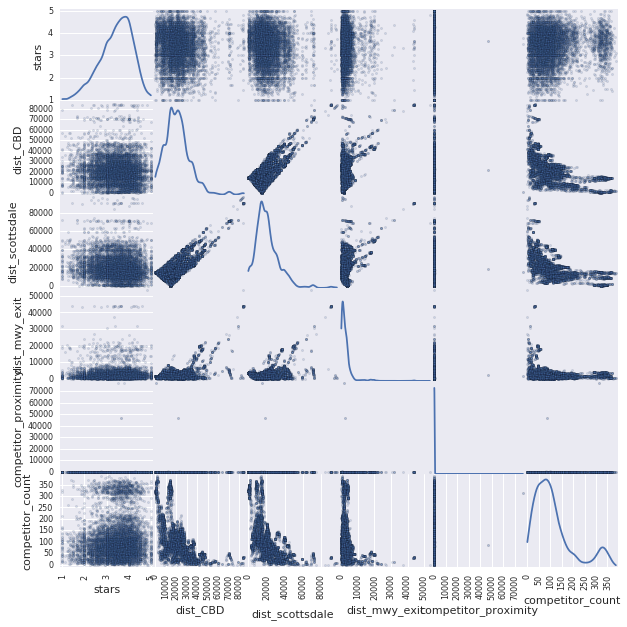

In [31]:
scatter_matrix(restaurants[['stars', 'dist_CBD', 'dist_scottsdale', 'dist_mwy_exit',
       'competitor_proximity', 'competitor_count']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Distance from CBD

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


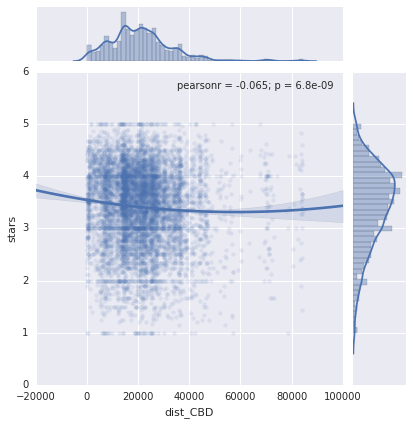

In [32]:
seaborn.jointplot(x='dist_CBD', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [33]:
restaurants['sqrt_dist_CBD'] = restaurants['dist_CBD']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


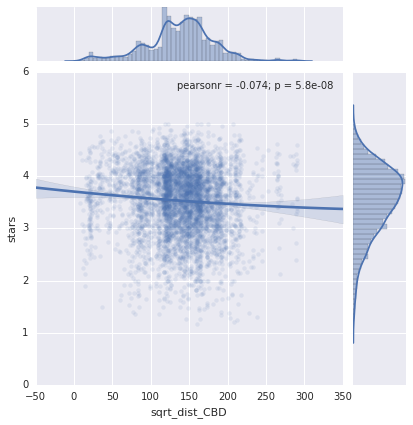

In [34]:
seaborn.jointplot(x='sqrt_dist_CBD', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Distance from Scottsdale Shopping

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


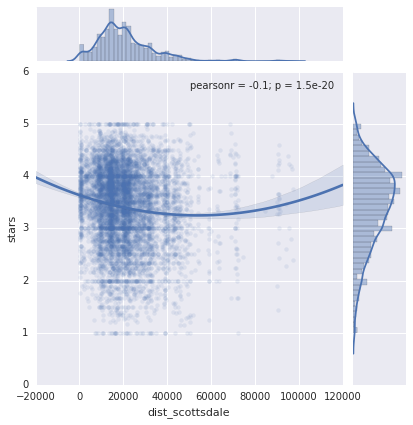

In [35]:
seaborn.jointplot(x='dist_scottsdale', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [36]:
restaurants['sqrt_dist_scottsdale'] = restaurants['dist_scottsdale']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


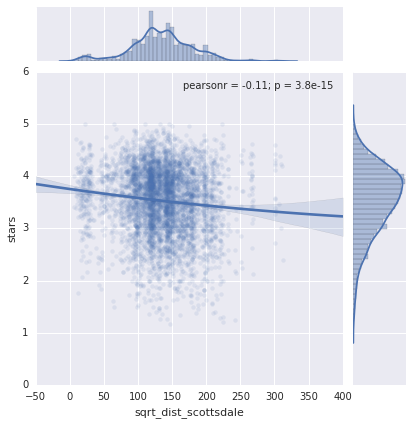

In [37]:
seaborn.jointplot(x='sqrt_dist_scottsdale', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Proximity of Competitors (within market area)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


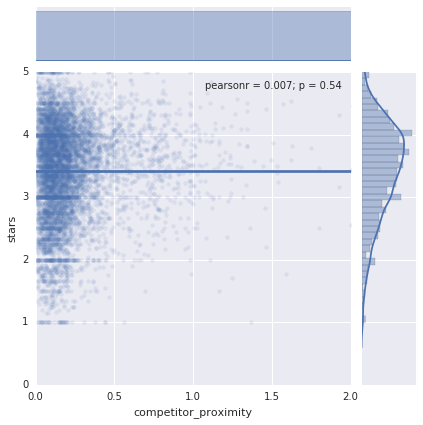

In [38]:
seaborn.jointplot(x='competitor_proximity', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2,
                  xlim=(0,2),
                  ylim=(0,5),
                  scatter_kws={'alpha':0.1},
                 )

In [39]:
restaurants['curt_competitor_proximity'] = restaurants['competitor_proximity'].apply(lambda score: score**0.33)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


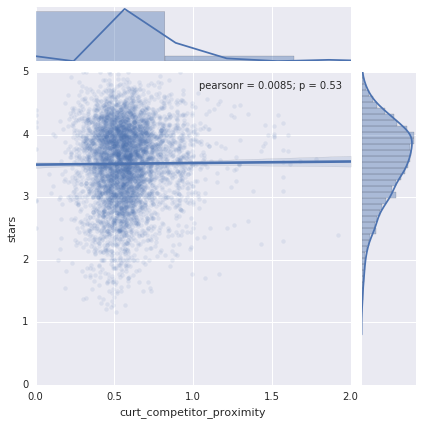

In [40]:
seaborn.jointplot(x='curt_competitor_proximity', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2,
                  xlim=(0,2),
                  ylim=(0,5),
                  scatter_kws={'alpha':0.1},
                 )

### Number of Competitors (within market area)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


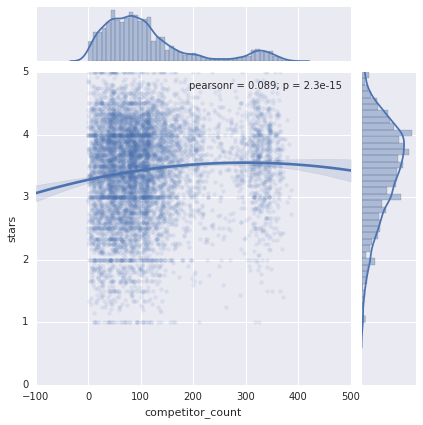

In [41]:
seaborn.jointplot(x='competitor_count', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2,
                  ylim=(0,5),
                  scatter_kws={'alpha':0.1},
                 )

In [42]:
restaurants['curt_competitor_count'] = restaurants['competitor_count']**0.33

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


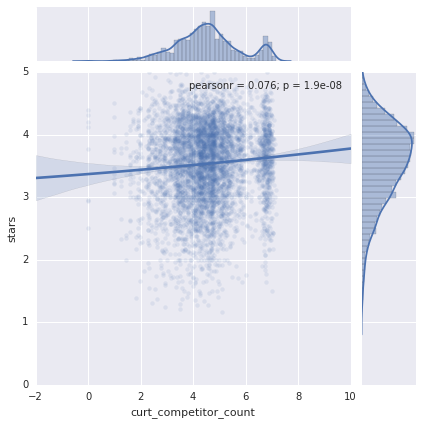

In [43]:
seaborn.jointplot(x='curt_competitor_count', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2,
                  ylim=(0,5),
                  scatter_kws={'alpha':0.1},
                 )

### Distance from Nearest Motorway Exit

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


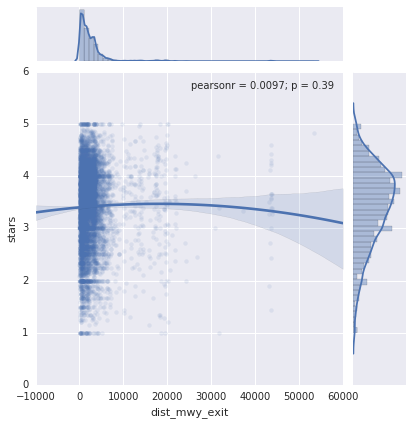

In [44]:
seaborn.jointplot(x='dist_mwy_exit', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [45]:
restaurants['sqrt_dist_mwy_exit'] = restaurants['dist_mwy_exit']**0.5 

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


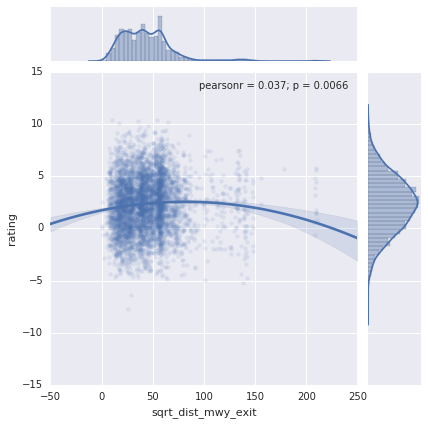

In [46]:
seaborn.jointplot(x='sqrt_dist_mwy_exit', y='rating',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [47]:
restaurants['log_dist_mwy_exit'] = restaurants['dist_mwy_exit'].apply(lambda dist: log(dist)) 

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


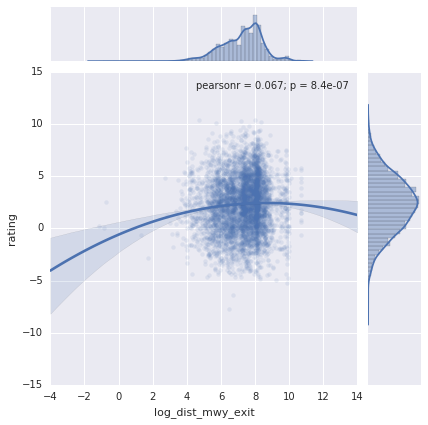

In [48]:
seaborn.jointplot(x='log_dist_mwy_exit', y='rating',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Demographic Predictor Variables

### Age & Population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8201ebd68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc82bfdde80>]], dtype=object)

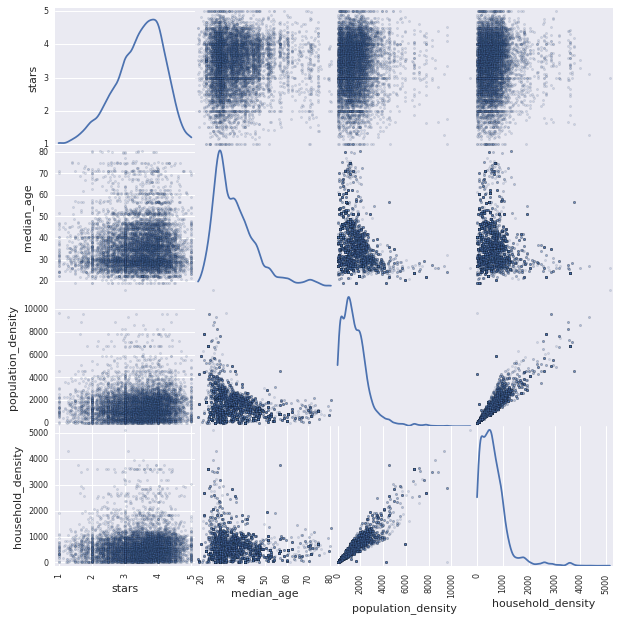

In [49]:
scatter_matrix(restaurants[['stars', 'median_age', 'population_density', 'household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [50]:
restaurants[['log_median_age', 'log_population_density', 'log_household_density']] = \
    (restaurants[['median_age', 'population_density', 'household_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8b08a6240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c035eeb8>]], dtype=object)

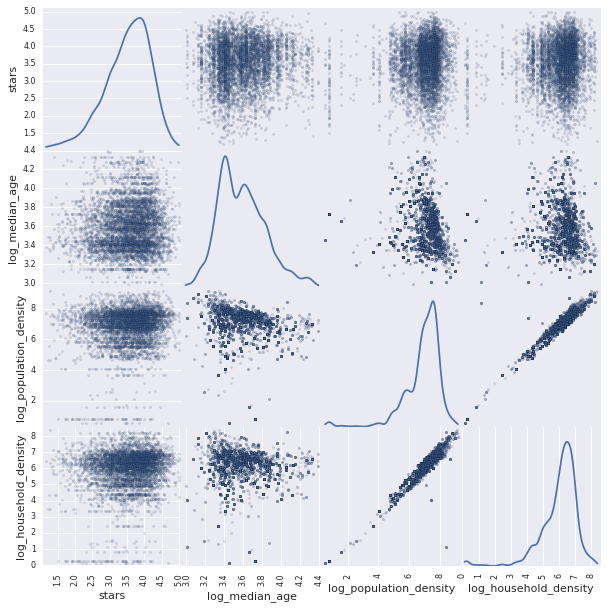

In [51]:
scatter_matrix(restaurants[restaurants['review_count']>MIN_REVIEW_COUNT][['stars', 'log_median_age', 'log_population_density', 'log_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

#### Median Age

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


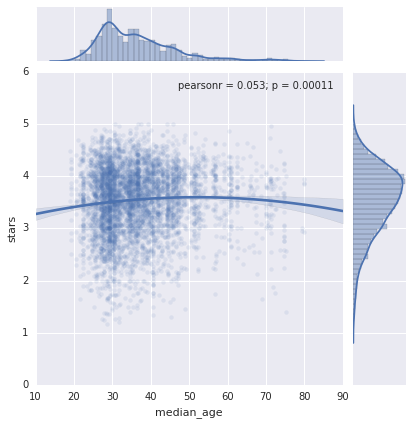

In [52]:
seaborn.jointplot(x='median_age', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [53]:
restaurants['curt_median_age'] = restaurants['median_age']**0.33

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


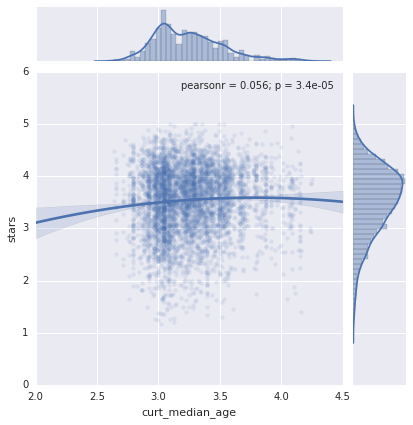

In [54]:
seaborn.jointplot(x='curt_median_age', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

#### Population Density

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


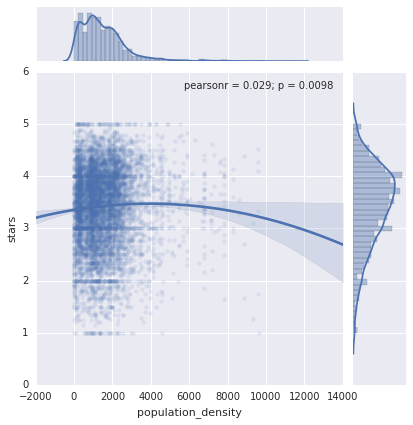

In [55]:
seaborn.jointplot(x='population_density', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [56]:
restaurants['curt_population_density'] = restaurants['population_density']**0.33

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


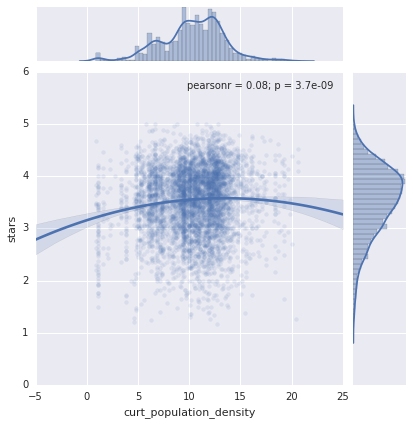

In [57]:
seaborn.jointplot(x='curt_population_density', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Home Ownership, Renters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc820532588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bf167da0>]], dtype=object)

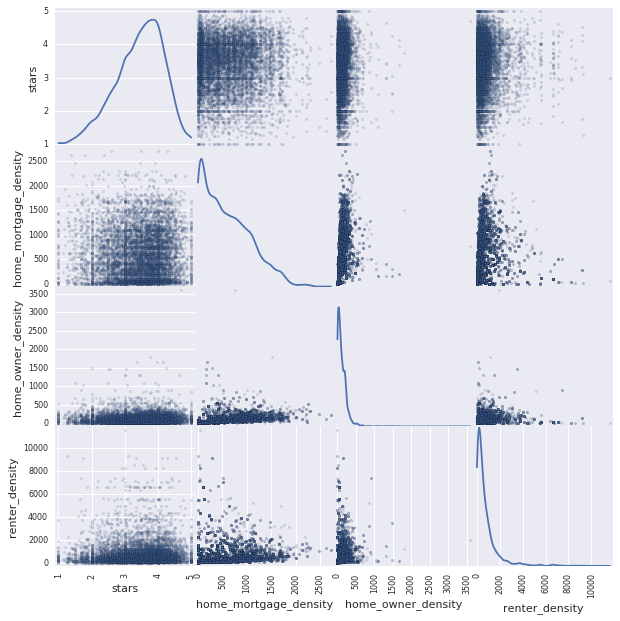

In [58]:
scatter_matrix(restaurants[['stars', 'home_mortgage_density', 'home_owner_density', 'renter_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [59]:
restaurants[['log_home_mortgage_density', 'log_home_owner_density', 'log_renter_density']] = \
    (restaurants[['home_mortgage_density', 'home_owner_density', 'renter_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bca47550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c03797b8>]], dtype=object)

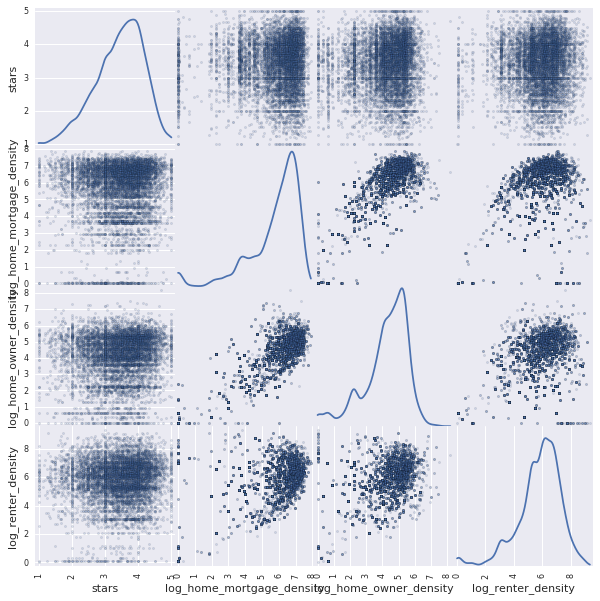

In [60]:
scatter_matrix(restaurants[['stars', 'log_home_mortgage_density', 'log_home_owner_density', 'log_renter_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Household Size, Type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8b1cece48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc891196be0>]], dtype=object)

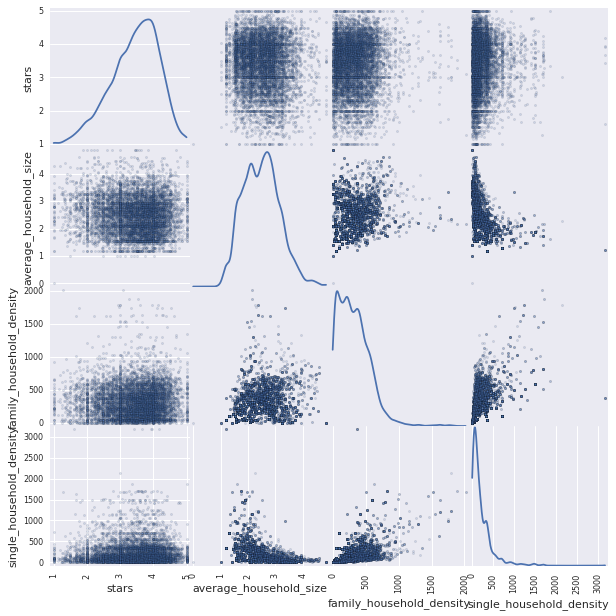

In [61]:
scatter_matrix(restaurants[['stars', 'average_household_size', 'family_household_density', 'single_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [62]:
restaurants[['log_average_household_size', 'log_family_household_density', 'log_single_household_density']] = \
    (restaurants[['average_household_size', 'family_household_density', 'single_household_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc843322908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc82ff51080>]], dtype=object)

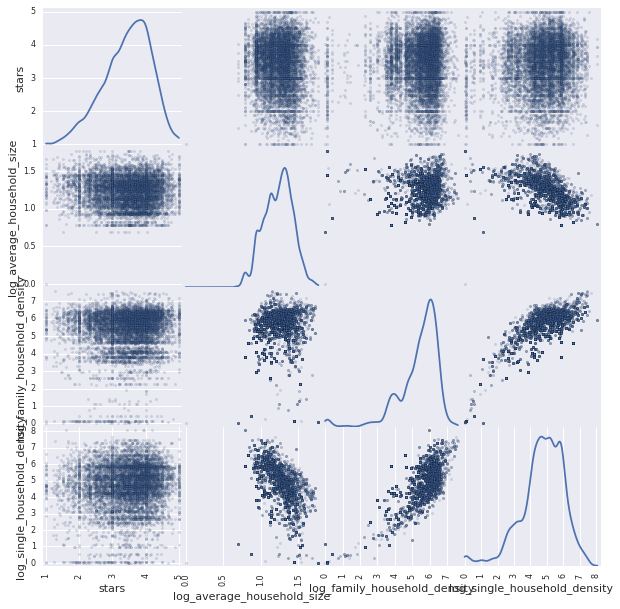

In [63]:
scatter_matrix(restaurants[['stars', 'log_average_household_size', 'log_family_household_density', 'log_single_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Race & Ethnicity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc88621e198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc826556da0>]], dtype=object)

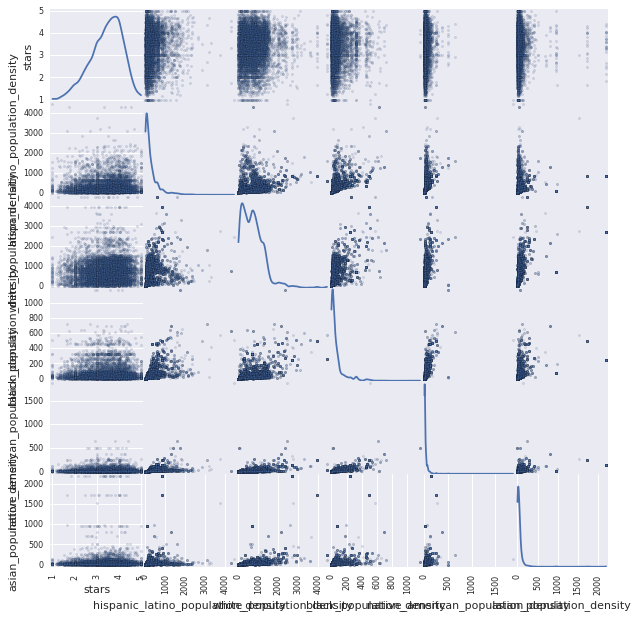

In [64]:
scatter_matrix(restaurants[['stars', 'hispanic_latino_population_density', 'white_population_density', 
                            'black_population_density', 'native_american_population_density', 
                            'asian_population_density'
                           ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [65]:
restaurants[['log_hispanic_latino_population_density', 'log_white_population_density', 
                  'log_black_population_density', 'log_native_american_population_density', 
                  'log_asian_population_density']
           ] = \
    (restaurants[['hispanic_latino_population_density', 'white_population_density', 
                  'black_population_density', 'native_american_population_density', 
                  'asian_population_density'
                 ]]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bd2ac0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc82775c630>]], dtype=object)

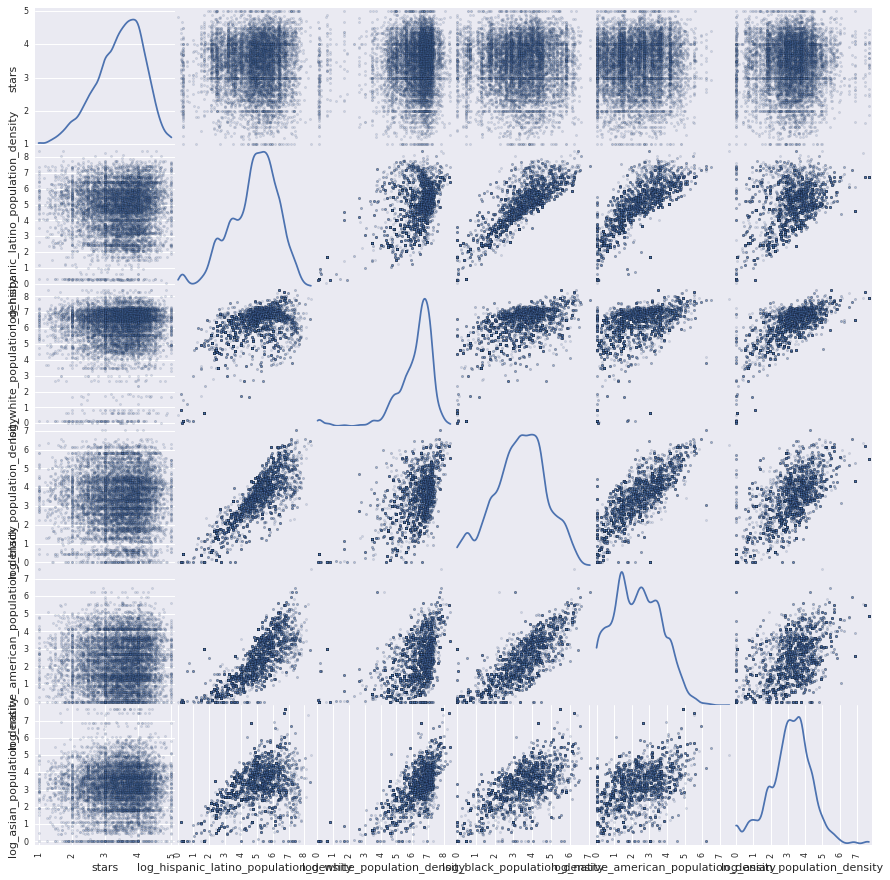

In [66]:
scatter_matrix(restaurants[['stars', 'log_hispanic_latino_population_density', 'log_white_population_density', 
                            'log_black_population_density', 'log_native_american_population_density', 
                            'log_asian_population_density'
                           ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(15,15)
              )

### Wealth & Income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8acd95a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc82b81fa90>]], dtype=object)

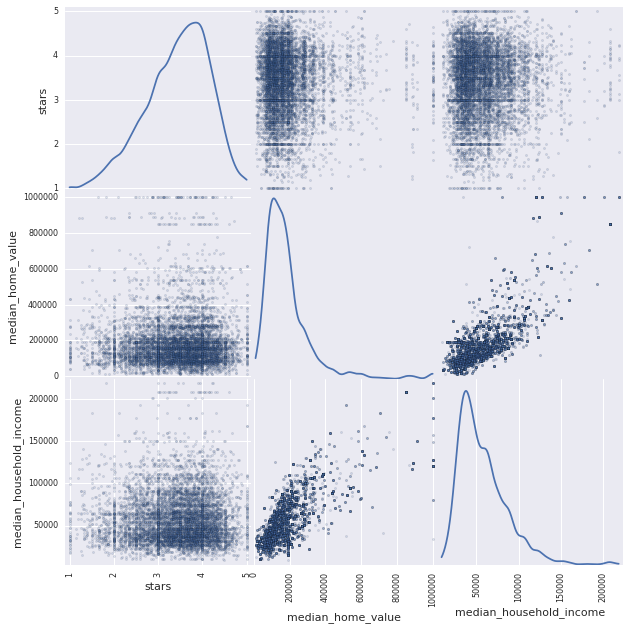

In [67]:
scatter_matrix(restaurants[['stars', 'median_home_value', 'median_household_income']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [68]:
restaurants[['log_median_home_value', 'log_median_household_income']] = \
    (restaurants[['median_home_value', 'median_household_income']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c05ea278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc85af41128>]], dtype=object)

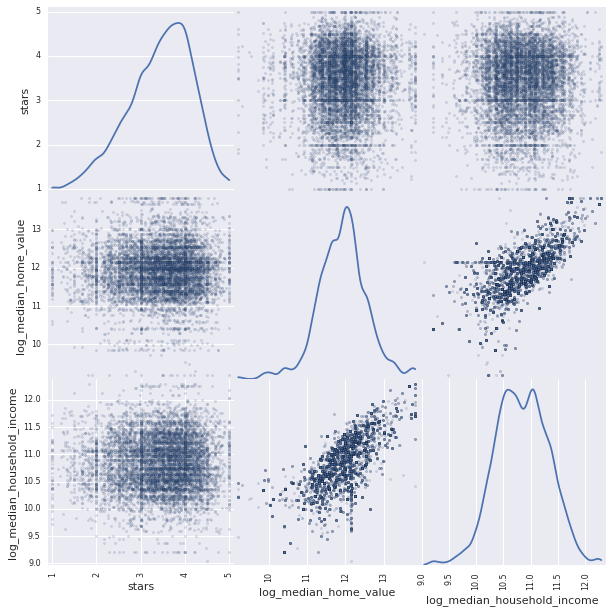

In [69]:
scatter_matrix(restaurants[['stars', 'log_median_home_value', 'log_median_household_income']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


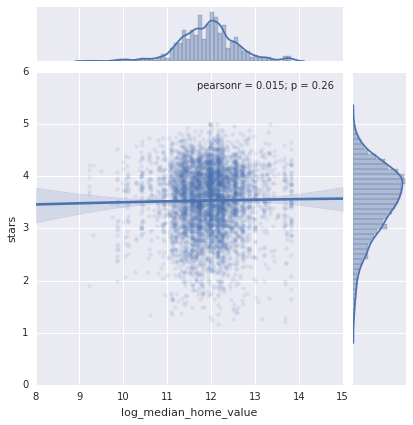

In [70]:
seaborn.jointplot(x='log_median_home_value', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


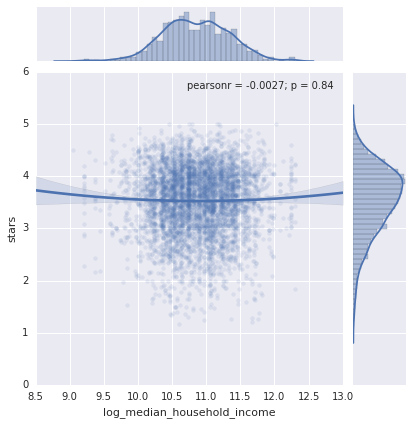

In [71]:
seaborn.jointplot(x='log_median_household_income', y='stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Education

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8545a14e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc868e5a668>]], dtype=object)

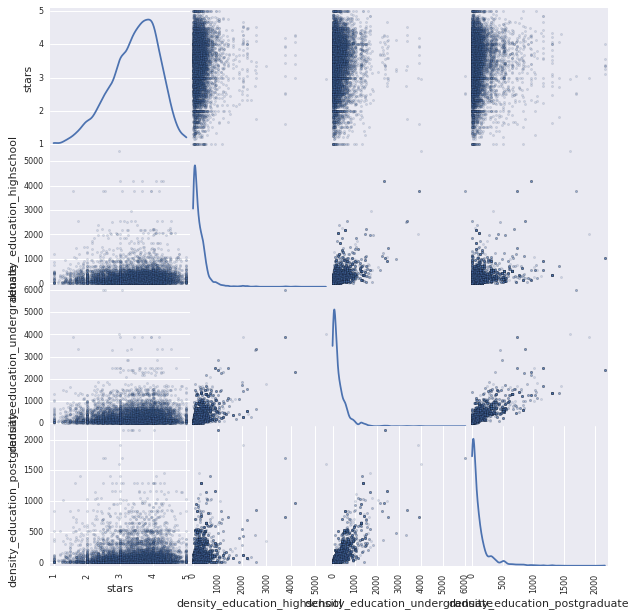

In [72]:
scatter_matrix(restaurants[['stars', 'density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [73]:
restaurants[['log_density_education_highschool', 'log_density_education_undergraduate',
       'log_density_education_postgraduate']] = \
    (restaurants[['density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8920c3d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc88f7eb8d0>]], dtype=object)

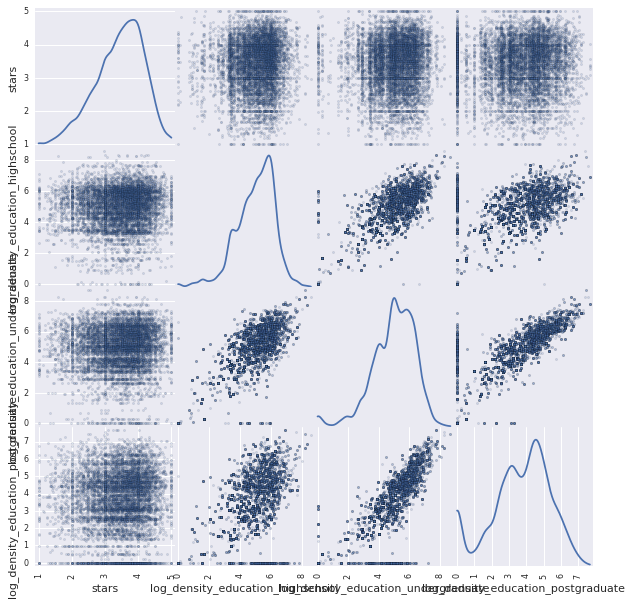

In [74]:
scatter_matrix(restaurants[['stars', 'log_density_education_highschool', 'log_density_education_undergraduate',
       'log_density_education_postgraduate']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

## Restaurant Attribute Predictor Variables

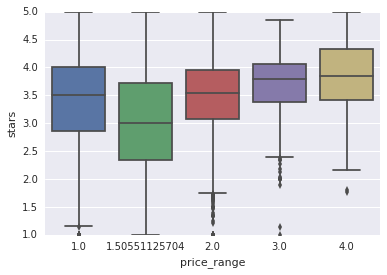

In [75]:
seaborn.boxplot(restaurants['price_range'], restaurants['stars'])

/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


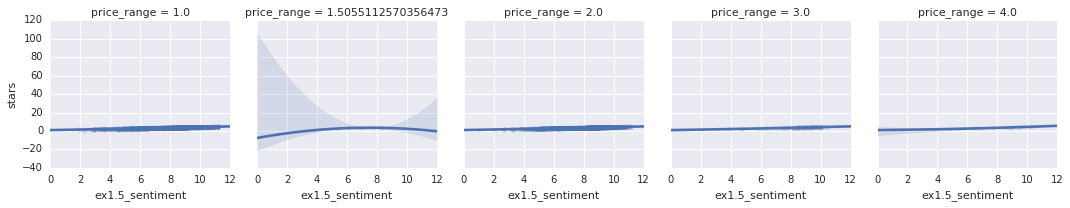

In [76]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='price_range'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

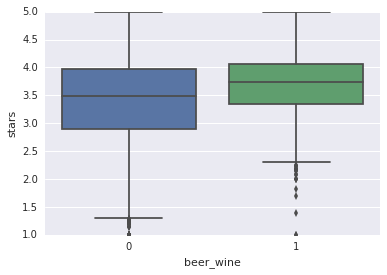

In [77]:
seaborn.boxplot(restaurants['beer_wine'], restaurants['stars'])

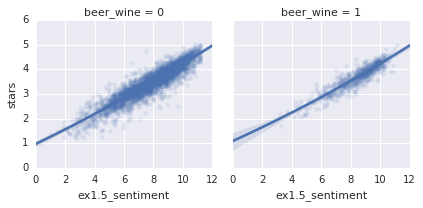

In [78]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='beer_wine'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

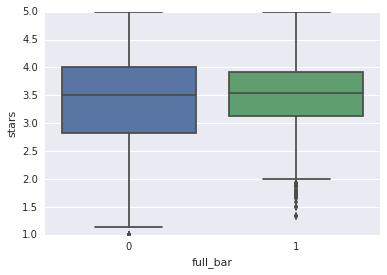

In [79]:
seaborn.boxplot(restaurants['full_bar'], restaurants['stars'])

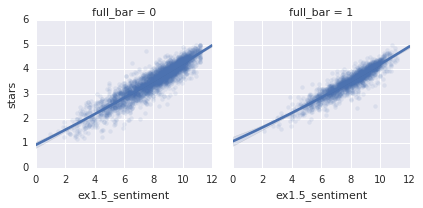

In [80]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='full_bar'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

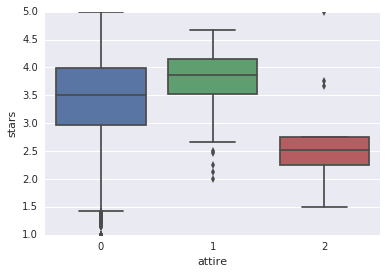

In [81]:
seaborn.boxplot(restaurants['attire'], restaurants['stars'])

/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly con

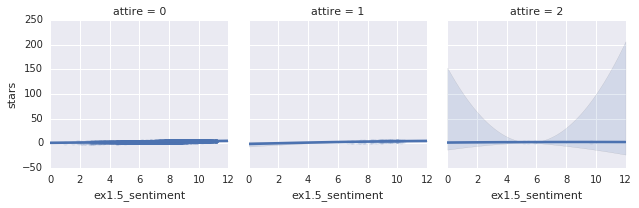

In [82]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='attire'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

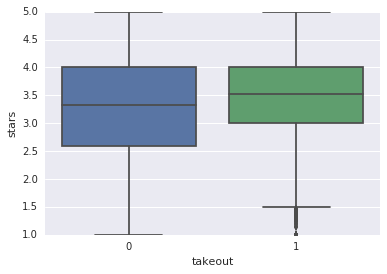

In [83]:
seaborn.boxplot(restaurants['takeout'], restaurants['stars'])

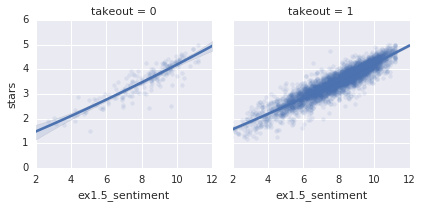

In [84]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='takeout'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

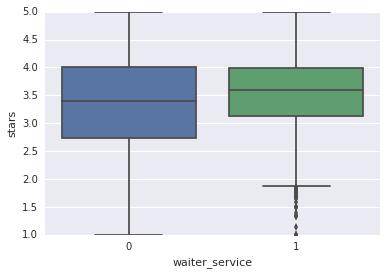

In [85]:
seaborn.boxplot(restaurants['waiter_service'], restaurants['stars'])

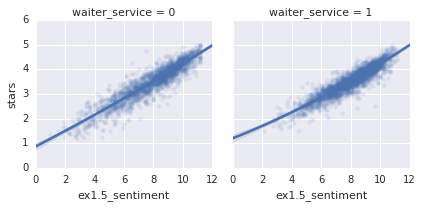

In [86]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='waiter_service'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

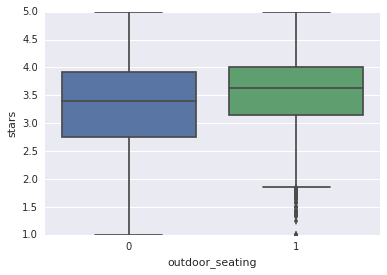

In [87]:
seaborn.boxplot(restaurants['outdoor_seating'], restaurants['stars'])

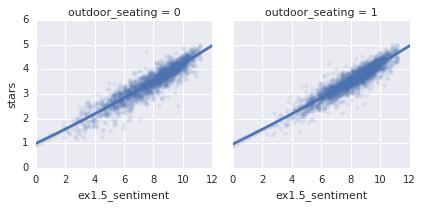

In [88]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='outdoor_seating'
                        )
grid.map(seaborn.regplot, 
         'ex1.5_sentiment', 
         'stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

## Topic Sentiment Predictor Variables

### Service, Food, Cost, and Atmosphere

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc843ad1da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc82215eda0>]], dtype=object)

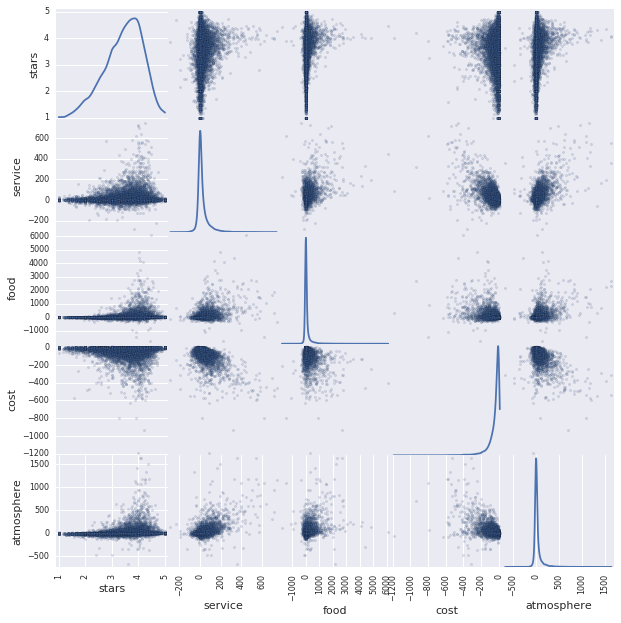

In [89]:
scatter_matrix(restaurants[['stars', 'service', 'food', 'cost', 'atmosphere']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [90]:
restaurants[['log_service', 'log_food', 'log_cost', 'log_atmosphere']] = \
    (restaurants[['service', 'food', 'cost', 'atmosphere']]
     .applymap(lambda value: (value+1e5)**(3))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bc813748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8bf85ca90>]], dtype=object)

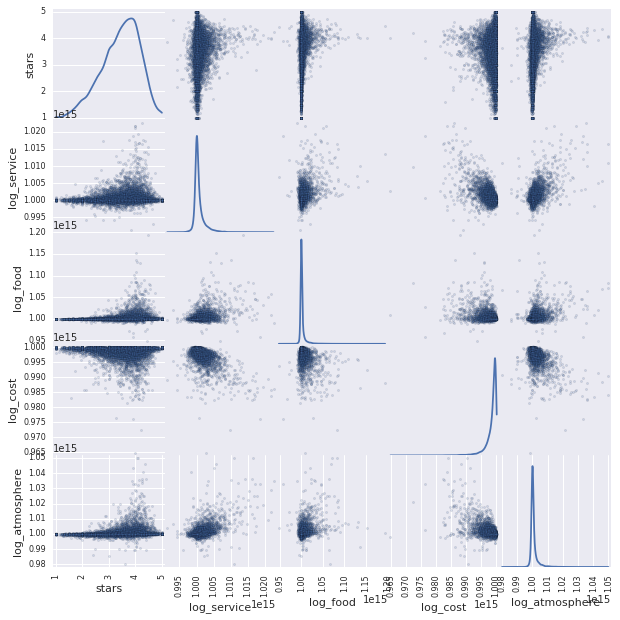

In [91]:
scatter_matrix(restaurants[['stars', 'log_service', 'log_food', 'log_cost', 'log_atmosphere']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Location, Alcohol, Time, People, and Opinion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86676ea58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8223d9898>]], dtype=object)

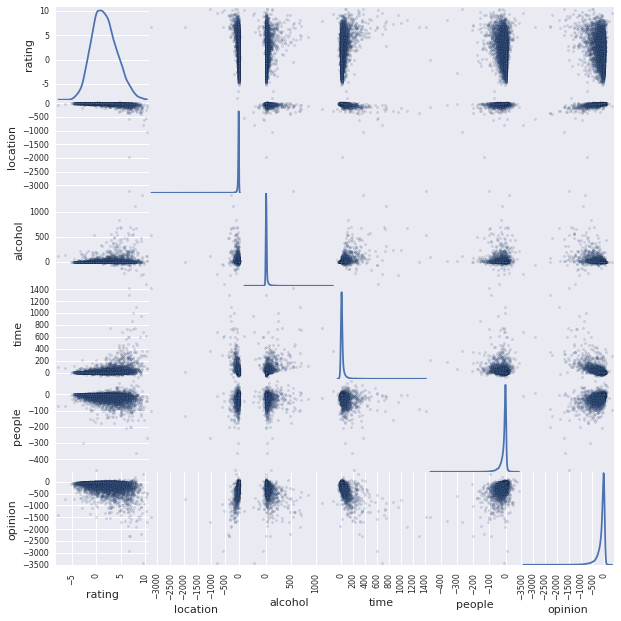

In [92]:
scatter_matrix(restaurants[['rating', 'location', 'alcohol', 'time', 'people', 'opinion']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [93]:
restaurants[['log_location', 'log_alcohol', 'log_time', 'log_people', 'log_opinion']] = \
    (restaurants[['location', 'alcohol', 'time', 'people', 'opinion']]
     .applymap(lambda value: log(value + 1e4))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc865a4e278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc842b11f28>]], dtype=object)

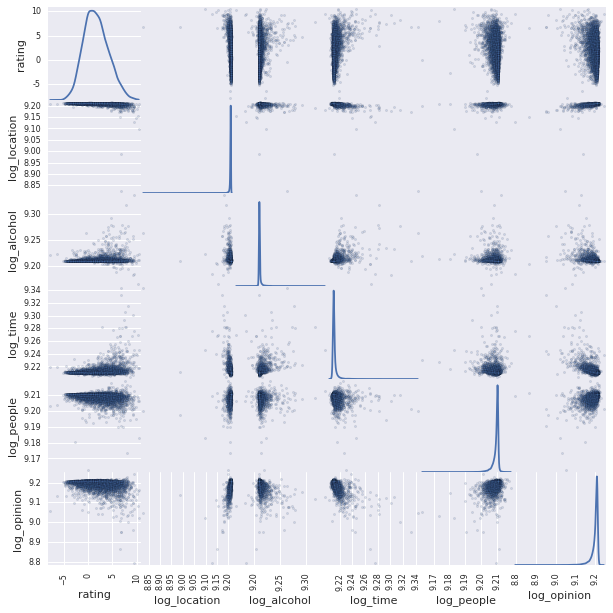

In [94]:
scatter_matrix(restaurants[['rating', 'log_location', 'log_alcohol', 'log_time', 
                            'log_people', 'log_opinion'
                          ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

## Remove non-useful variables (e.g. non-linear)

In [95]:
# these variables were transformed or demonstrated no predictive ability above
restaurants.drop(['log_review_count', 'median_age', 'average_household_size',
                  'population_density', 'home_mortgage_density', 'home_owner_density',
                  'renter_density', 'household_density', 'family_household_density',
                  'single_household_density', 'hispanic_latino_population_density',
                  'white_population_density', 'black_population_density',
                  'native_american_population_density', 'asian_population_density',
                  'median_home_value', 'median_household_income',
                  'density_education_highschool', 'density_education_undergraduate',
                  'density_education_postgraduate', 'uniqueness', 'review_span', 
                  'sentiment', 'service', 'cost', 'opinion', 'people', 
                  'food', 'location', 'atmosphere', 'time', 'alcohol', 'rating',
                  'dist_CBD', 'dist_scottsdale', 'dist_mwy_exit', 'competitor_proximity',
                  'curt_competitor_proximity', 'sqrt_dist_mwy_exit',
                  'log_dist_mwy_exit', 'log_median_age', 'log_population_density', 
                  'log_household_density', 'curt_median_age', 'curt_population_density',
                  'log_home_mortgage_density', 'log_home_owner_density', 'log_renter_density',
                  'log_average_household_size', 'log_family_household_density', 
                  'log_single_household_density', 'log_hispanic_latino_population_density', 
                  'log_white_population_density','log_black_population_density', 
                  'log_native_american_population_density', 'log_asian_population_density',
                  'log_median_home_value', 'log_median_household_income', 
                  'log_density_education_highschool', 'log_density_education_undergraduate',
                  'log_density_education_postgraduate', 'log_service', 'log_food', 'log_cost', 
                  'log_atmosphere', 'log_location', 'log_alcohol', 'log_time', 'log_people', 
                  'log_opinion'                  
                ], axis=1, inplace=True)

## Save Data

In [96]:
# shorten names for ESRI compatability
restaurants.rename(columns={'business_id': 'bus_id', 
                            'full_address': 'address', 
                            'name': 'rest_name', 
                            'price_range': 'price_rng', 
                            'waiter_service': 'wait_svc',
                            'outdoor_seating': 'outdr_seat', 
                            'log_sq_uniqueness': 'ln_sq_unqe', 
                            'log_review_span': 'ln_rw_span',
                            'ex1.5_sentiment': 'rt_sentmnt',
                            'log_curt_review_count': 'ln_crt_rvc', 
                            'sqrt_dist_CBD': 'sr_dst_CBD', 
                            'sqrt_dist_scottsdale': 'sr_dst_scd', 
                            'curt_competitor_count': 'cr_comp_ct'
                           }, inplace=True
                  )

# save as csv
restaurants[restaurants['review_count']>MIN_REVIEW_COUNT].to_csv('../data/restaurants.csv')

# save as shapefile
restaurants[restaurants['review_count']>MIN_REVIEW_COUNT].to_file('../data/shapefiles/restaurants/restaurants.shp')